### Code for generating various Seaborn graphs from timing and properties data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import timeit

sns.set(font_scale=1.75)

In [ ]:
# Load dataset
properties = pd.read_csv('../matrix_properties/processed_properties.csv', header=0, index_col=0)
bridges = pd.read_csv('../system_runtimes/bridges/bridges_unprocessed_timings.csv', header=0, index_col=0)
janus = pd.read_csv('../system_runtimes/janus/janus_unprocessed_timings.csv', header=0, index_col=0)
comet = pd.read_csv('../system_runtimes/comet/comet_unprocessed_timings.csv', header=0, index_col=0)
summit = pd.read_csv('../system_runtimes/summit/summit_unprocessed_timings.csv', header=0, index_col=0)


In [ ]:
times_arr = [bridges, janus, comet, summit]
times = pd.concat(times_arr)
combined = pd.merge(properties, times, on='matrix')
combined = combined.dropna()
combined = combined.drop_duplicates()
combined.info()

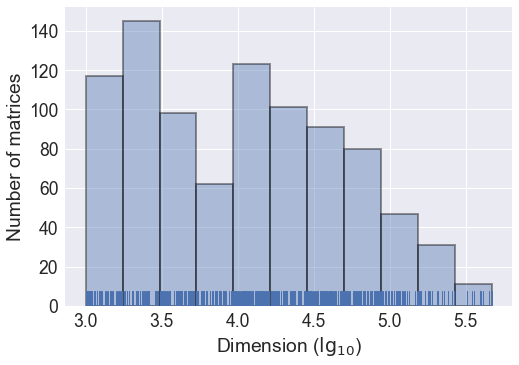

In [3]:
combined["log10_rows"] = np.log10(combined.rows)
ax = sns.distplot(combined.drop_duplicates(['matrix']).log10_rows, 
                  kde=False, rug=True, 
                  hist_kws=dict(edgecolor="k", linewidth=2))
ax.set(xlabel='Dimension ($\lg_{10}$)', 
       ylabel='Number of matrices')
sns.plt.show()

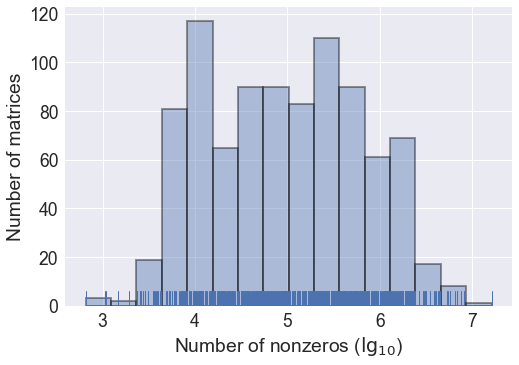

In [4]:
combined['log10_nnz'] = np.log10(combined.nnz)
ax = sns.distplot(combined.drop_duplicates(['matrix']).log10_nnz, 
                 kde=False, rug=True,
                 hist_kws=dict(edgecolor="k", linewidth=2))
ax.set(xlabel='Number of nonzeros ($\lg_{10}$)', 
       ylabel='Number of matrices')
sns.plt.show()

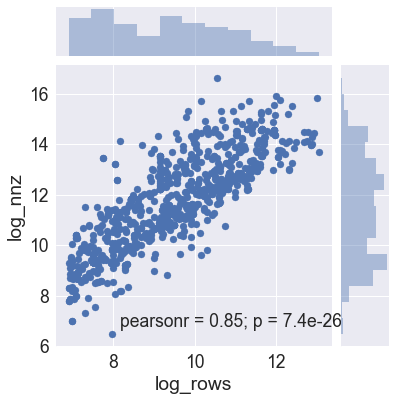

In [5]:
combined['log_rows'] = np.log(combined.rows)
combined['log_nnz'] = np.log(combined.nnz)
sns.jointplot(x="log_rows", y="log_nnz", data=combined.drop_duplicates(['matrix']))
sns.plt.show()

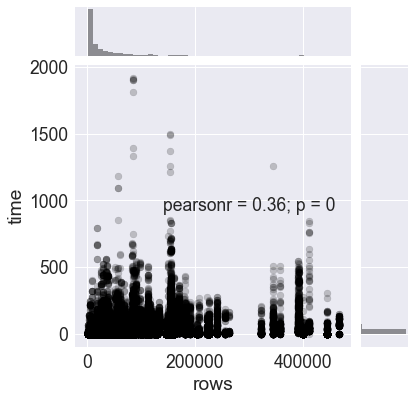

In [6]:
sns.jointplot(x="rows", y="time", data=combined.dropna(), alpha=0.2, color='k')
sns.plt.show()